## PROJETO DE MACHINE LEARNING PARA PREDIÇÃO NO PREÇO DE PLANO DE SAÚDE - MODELO DE REGRESSÃO LINEAR.

#### Problema de negócio consiste em empresa fechar novo contrato para ofertar plano de saúde para uma empresa e quer consultar baseada nos dados dos clientes atuais o quanto gasta-se em média cada cliente para ela inserir o quanto ela deve cobrar nesse novo contrato.

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
Base_Dados = pd.read_csv("d:/Repositório GIT/Projetos/Prediction-Price-Health/Datasets/Base_Dados_Plano_Saude.csv")
Base_Dados.head()




,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Tamanho da base.

In [3]:
Base_Dados.shape

(1338, 7)

#### Como está estruturados os dados. Isso permite verificar se tem alguma variável com uma classe diferente do que deveria estar.

In [4]:
Base_Dados.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### Verificar informações relacionadas a valores nulos e quantidade de dados em cada variável.

In [5]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
Base_Dados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Mapa de calor para identificar de forma mais rápida pontos nulos.

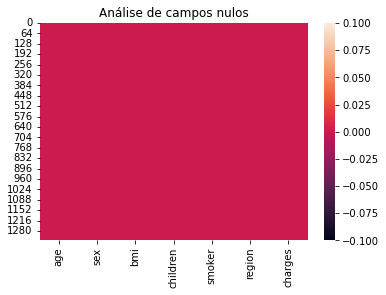

In [7]:
plt.title('Análise de campos nulos')
sns.heatmap( Base_Dados.isnull() );

#### Resumo estatístico das variáveis. O comando include = 'all' permite que inserir as variáveis qualitativas.

In [8]:
Base_Dados.describe( include='all' )

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### Análise Exploratória - Consiste em um conjunto de gráficos e dados estatístico com objetivo de encotrar distribuição, disperação, correlação entre as variáveis, padrões etc... Para isso podemos gerar o seguinte gráfico.

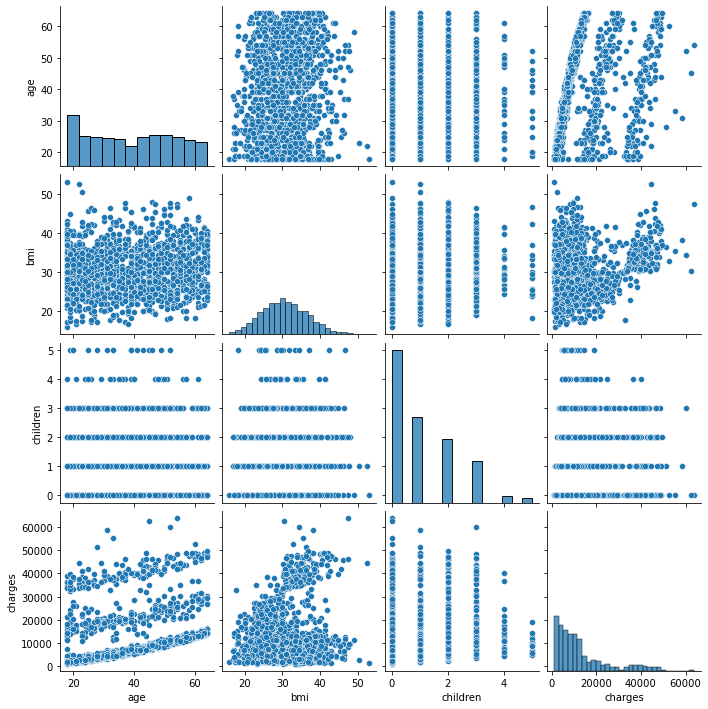

In [9]:
sns.pairplot( Base_Dados );

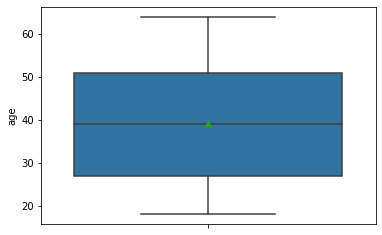

In [10]:
sns.boxplot( y=Base_Dados['age'], showmeans=True  );

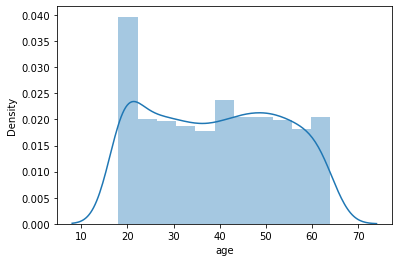

In [11]:
sns.distplot( Base_Dados['age'] );

In [12]:
Base_Dados['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

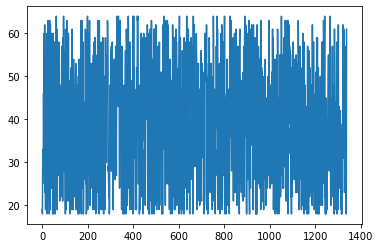

In [13]:
plt.plot( Base_Dados['age'].values );

#### Em vez de fazer gráfico um a um, podemos gerar os gráficos de todas variáveis de vez.

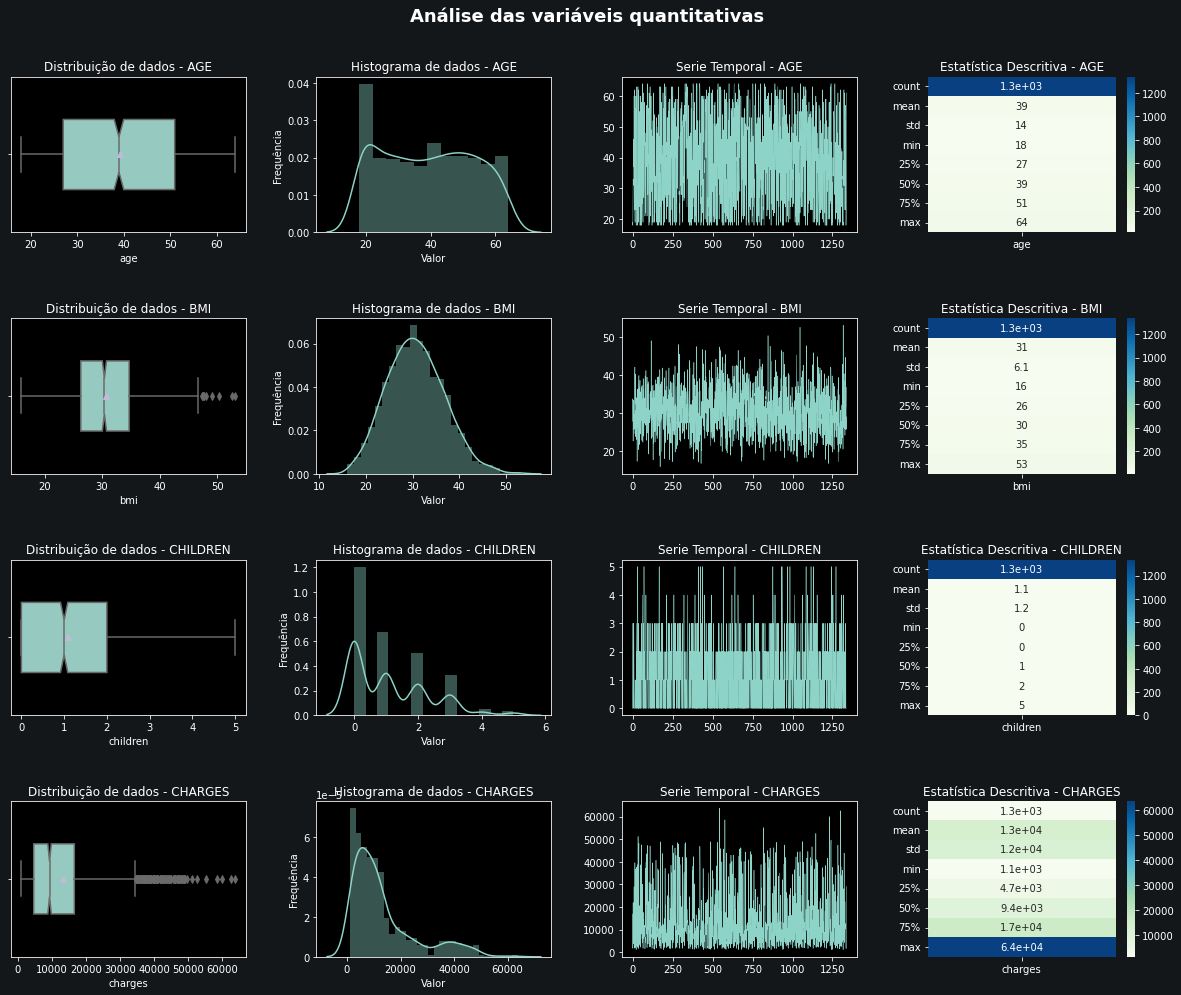

In [14]:
# Grid de gráficos
Quantidade_Graficos = 4
Colunas = 4
Loop_Repeticao = 1

# Ajuste do relatorio
Figura = plt.figure( figsize=(20, 15) )
Cor_Fundo = "#14171a"
Figura.set_facecolor(Cor_Fundo)

# Estilo
plt.style.use('dark_background')

# Titulo principal
plt.suptitle(f'Análise das variáveis quantitativas', fontsize=18, color='#ffffff', fontweight=600 )

# Loop usando o Index e Nome da coluna
for Index, Coluna in zip( Base_Dados.dtypes.index, Base_Dados.dtypes.values ):

  # Apenas se for numerico
  if Coluna != object:

    # Boxplot
    plt.subplot( Quantidade_Graficos, Colunas, Loop_Repeticao )
    plt.title(f'Distribuição de dados - {Index.upper()}')
    sns.boxplot( x=Base_Dados[Index], width=0.45, notch=True, showmeans=True )
    Loop_Repeticao += 1

    # Distplot
    plt.subplot( Quantidade_Graficos, Colunas, Loop_Repeticao )
    sns.distplot( Base_Dados[Index] )
    plt.title(f'Histograma de dados - {Index.upper()}')
    plt.xlabel('Valor')
    plt.ylabel('Frequência')
    Loop_Repeticao += 1

    # Serie
    plt.subplot( Quantidade_Graficos, Colunas, Loop_Repeticao )
    plt.title(f'Serie Temporal - {Index.upper()}')
    plt.plot( Base_Dados[Index].values, linewidth=0.5 )
    Loop_Repeticao += 1

    # Estatística
    plt.subplot( Quantidade_Graficos, Colunas, Loop_Repeticao )
    plt.title(f'Estatística Descritiva - {Index.upper()}')
    sns.heatmap( pd.DataFrame( Base_Dados[Index].describe() ), annot=True, cmap="GnBu" ) ## Tentar tirar da notação cientifica.
    Loop_Repeticao += 1
    
plt.subplots_adjust( left=0.1, bottom=0.1, right=0.9, top=0.915, wspace=0.3, hspace=0.55 );

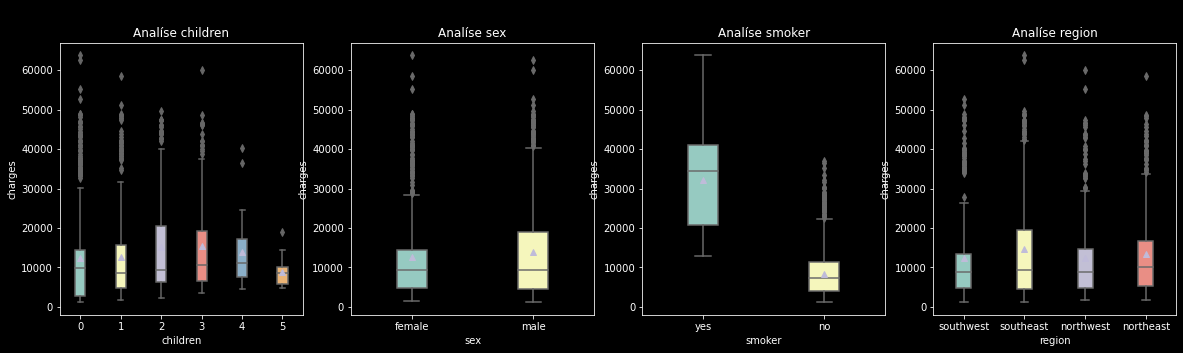

In [15]:
# Separando as colunas
Dados_Categoricos = Base_Dados[['children', 'sex', 'smoker', 'region', 'charges']]

# Ajuste da Figura
Figura = plt.figure( figsize=(20, 5) )
plt.suptitle(f'Análise categorica', fontsize=18, color='black', fontweight=600 )

# Loop
for Loop, Coluna in enumerate( Dados_Categoricos.columns[0:4] ):

  # Grid, Titulo e Plot
  plt.subplot(1, 4, Loop + 1 )
  plt.title(f'Analíse {Coluna}')
  sns.boxplot( data=Dados_Categoricos, y='charges', x=Coluna, width=0.25, showmeans=True )

# Ajuste layout
plt.subplots_adjust()